# Увеличение выручки интернет-магазина

**Цель исследования**

Приоритизировать гипотезы по увеличению выручки интернет-магазина. Проанализировать результаты A/B теста.

**Описание данных**

Для анализа предоставлены 3 датасета:

1. датасет хранит информацию о гипотезах;
2. хранит информацию о заказах;
3. содержит информацию о посетителях.

**Ход исследования**

1. Проведем обзор данных - составим первое представление о предоставленных данных, оценим их объем и качество.
2. Выполним предобработку данных - проверим данные на возможные ошибки (аномалии, пропуски). Исправим данные.
3. Исследуем данные.
4. Приоритизируем гипотезы.
5. Проведем анализ A/B-теста.
6. Подведем итоги исследования.

## 1. Обзор данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

В нашем распоряжении 3 датасета. Чтобы оптимизировать действия по их загрузке и выводу информации о них, напишем функцию dataset_open() для загрузки датасетов и получения информации о них: 

In [2]:
def dataset_open(file):
    """ Функция для загрузки датасета, 
    вывода на экран части загруженных данных 
    и общей информации  о нем.

    Args:
        file: ссылка на источник данных.
    Returns:
        pd.DataFrame: таблица с исходными данными.
    """    
    result = pd.read_csv(file) #загрузим датасет
    result.columns = result.columns.str.lower() #загрузим названия столбцов строчными буквами
    display(result.head()) #выведем на экран 5 верхних строк датасета
    result.info() #выведем информацию о датасете
    
    return result 

### 1.1. Используем функцию `dataset_open()` для загрузки датасета с данными о гипотезах и сохраним их в переменной `hypothesis`

In [3]:
try:
    hypothesis = dataset_open('')
except:
    hypothesis = dataset_open(file)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датафрейм состоит из 5 столбцов и 9 строк. Пропуски в данных отсутствуют.

Типы данных int64(4 столбца) и object (1 столбец) - описание гипотезы. Корректировка типов данных не требуется.

Объем памяти примерно 488 B

### 1.2. Загрузим данные о заказах и сохраним в переменной `orders_new`

In [4]:
try:
    orders_new = dataset_open('')
except:
    orders_new = dataset_open(file)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датафрейм состоит из 5 столбцов и 1197 строк. Количество значений в столбцах совпадает с общим количеством строк, значит, пропуски в данных отсутствуют. 
Объем памяти примерно 46.9 KB

Типы данных int64, object и float64. Потребуется корректировка типа данных в столбце *date*.  На следующем этапе переведем его в формат *datetime*.
Названия столбцов *transactionid* и *visitorid* приведем к "змеиному" регистру тоже на следующем этапе.

### 1.3. Теперь загрузим данные о пользователях и сохраним в переменной `visitors`

In [5]:
try:
    visitors = dataset_open('')
except:
    visitors = dataset_open(file)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В последнем датасете 3 столбца и 62 строки. Количество значений в столбцах совпадает с общим количеством строк, пропуски в данных отсутствуют. 
Объем памяти примерно 1.6 KB

Типы данных object и int64. Потребуется корректировка типа данных в столбце *date*.  На следующем этапе переведем его в формат *datetime*.

### 1.4. Выводы

Данные для анализа предоставлены в 3-х файлах, названия столбцов в каждом датасете мы привели к строчному регистру при загрузке.  Пропущенные значения отсутствуют:

1. Данные о гипотезах загрузили в переменную `hypothesis`:   
    - 5 столбцов и 9 строки;
    - типы данных int64 и object, корректировка типов данных не требуется.
    
    
2. Данные о заказах сохранили в переменной `orders_new`: 
    - 5 столбцов и 1197 строк;
    - типы данных int64, object и float64;
    - тип данных в столбце *date* не соответствует содержанию - переведем  в тип *datetime* на следующем этапе;
    - названия столбцов *transactionid* и *visitorid* приведем к "змеиному" регистру на следующем этапе.
    
    
3. Данные о пользователях сохранили в переменной `visitors`: 
    - в датафрейме 3 столбца и 62 строки;
    - типы данных object и int64;
    - тип данных в столбце *date* не соответствует содержанию - переведем  в тип *datetime*

В 2-х датасетах нужно исправить тип данных в столбцах с датами, в 1-м датасете привести названия столбцов к "змеиному" регистру - займемся этим на следующем этапе. И более подробно изучим полученные датафреймы, проверим на аномалии, дубликаты и исправим выявленные несоответствия. 

## 2. Предобработка данных

### 2.1. Первым шагом исправим названия столбцов в датасете `orders_new`
Используем метод `rename()` и для проверки выведем названия столбов

In [6]:
orders_new = orders_new.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'})
orders_new.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Убедились в успешном переименовании, столбцы в нужном стиле.

### 2.2. Исправим формат даты в данных

В датасетах `orders_new` и `visitors` исправим тип данных с помощью метода `to_datetime()` и проверим полученный тип данных:

In [7]:
orders_new['date'] = pd.to_datetime(orders_new['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
str(orders_new['date'].dtype)

'datetime64[ns]'

In [9]:
str(visitors['date'].dtype)

'datetime64[ns]'

Убедились в успешном изменении типа данных

### 2.3. Проверим данные на аномалии, явные и неявные дубликаты

#### 2.3.1. Проверим данные из датасета `hypothesis` 

Датасет состоит из 5 столбцов и 9 строк, поэтому его содержание мы можем оценить визуально. Проверим описание гипотез на уникальность и  убедимся, что в остальных столбцах датасета все числа находятся в интервале от 1 до 10 и аномалии отсутствуют, для этого выведем всю таблицу `hypothesis`. Для полного отображения описания гипотез используем дополнительную настройку: 

In [10]:
pd.set_option('display.max_colwidth', False)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Все 9 гипотез уникальные, явные и неявные дубликаты отсутствуют.
В результате проверки видим корректные данные во всех столбцах датасета.

#### 2.3.2. Проверим данные из датасета `orders_new`

Проверим отсутствие ошибок в группах A/B-тестов, это данные столбца *group*:

In [11]:
orders_new['group'].unique()

array(['B', 'A'], dtype=object)

У нас 2 группы тестов: А и В, как и должно быть. Проверим датасет на наличие полных дубликатов:

In [12]:
orders_new.duplicated().sum()

0

Дубликаты отсутствуют

#### 2.3.3. Проверим данные из датасета `visitors`

Убедимся в корректности указания групп A/B-тестов, это данные столбца *group*:

In [13]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Имеем 2 группы тестов: А/В. 

Проверим датасет на наличие полных дубликатов:

In [14]:
visitors.duplicated().sum()

0

Полные дубликаты в датасете отсутствуют.

### 2.4. Выводы

На этапе предобработки мы подготовили данные для дальнейшего исследования:

1. Исправили стиль названий столбцов в датасете `orders_new`, новые названия *transaction_id* и *visitor_id*.

2. В датасетах `orders_new` и `visitors` привели в соответствие тип данных в столбцах, содержащих даты - тип данных преобразовали в *datetime*.

3. Проверили текстовые столбцы на наличие дубликатов и убедились в их отсутствии, все данные уникальны.

4. Полные дубликаты в датасетах отсутствуют, все строки содержат уникальные данные.


Следующим шагом более подробно исследуем данные, содержащиеся в наших датафреймах.

## 3. Исследование данных

На этом этапе более подробно изучим имеющиеся данные

### 3.1. Исследование данных датасета `hypothesis`

Большинство столбцов в этом датасете, кроме столбца с описанием гипотез, числовые, используем метод `describe()` и получим представление о содержащихся в этих столбцах данных:

In [15]:
hypothesis.describe()

,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Видим, в каждом столбце минимальное значение  1, максимальное 10 у 3-х параметров, кроме *confidence*, у него максимальное значение равно 9. Описание данных reach и impact совпадает по большинству параметров.

### 3.2. Исследование данных датасета `orders_new`

#### 3.2.1. Определим минимальную и максимальную дату заказов:

In [16]:
print('Минимальная дата заказа:', orders_new['date'].dt.date.min())
print('Максимальная дата заказа:', orders_new['date'].dt.date.max())

Минимальная дата заказа: 2019-08-01
Максимальная дата заказа: 2019-08-31


#### 3.2.2. Определим количество уникальных пользователей
На 1-м этапе мы определили количество уникальных заказов - 1197, что равно количеству строк в датафрейме. Посчитаем количество уникальных пользователей, которые оформили заказы:

In [17]:
print('Количество уникальных пользователей, оформивших заказ, составляет:', orders_new['visitor_id'].nunique())

Количество уникальных пользователей, оформивших заказ, составляет: 1031


Отличие количества заказов и количества уникальных пользователей говорит о том, что часть из них совершали повторные заказы и повторно принимали участие в тестировании, т.е. по одному пользователю есть несколько наблюдений.

Посмотрим на ТОП-10 самых активных пользователей за период:

In [18]:
orders_new['visitor_id'].value_counts().head(10)

4256040402    11
2458001652    11
2378935119    9 
2038680547    8 
199603092     5 
237748145     5 
3717692402    5 
3062433592    5 
3803269165    5 
1230306981    5 
Name: visitor_id, dtype: int64

Изучим детали пользователя на примере одного из id 2458001652, который сделал 11 заказов. Отсортируем срез по возрастанию даты заказа.

In [19]:
orders_new.query('visitor_id == 2458001652').sort_values(by='date')

,transaction_id,visitor_id,date,revenue,group
611,1244084011,2458001652,2019-08-04,340,A
883,2412219836,2458001652,2019-08-05,2420,B
454,3755354294,2458001652,2019-08-06,7349,B
456,543654048,2458001652,2019-08-06,1620,A
483,2280027650,2458001652,2019-08-06,6681,B
727,3959083601,2458001652,2019-08-07,17379,A
916,527333943,2458001652,2019-08-08,5227,B
692,3586870909,2458001652,2019-08-09,5227,B
1062,1817215137,2458001652,2019-08-11,8280,A
133,3060563671,2458001652,2019-08-22,5190,A


Из таблицы мы видим, что дата 1-го заказа была 4 августа, дата последнего заказа 25 августа, 6 августа клиент сделал несколько заказов. В течение всего периода пользователь попадал в разные группы A/B теста, чего не должно быть при  проведении тестирования, каждый пользователь должен входить только в одну группу, при сборе данных допущены ошибки. Оценим количество таких пользователей в выборке, т.е. нам нужны те, чей *id* входит в обе группы теста. Воспользуемся методом `groupby` по *visitor_id* и посчитаем в какое количество уникальных групп входит пользователь, запишем таблицу в переменную `orders_`.

In [20]:
orders_ = orders_new.groupby('visitor_id', as_index=False).agg({'group':'nunique'})
orders_

,visitor_id,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


По части выведенной таблицы видим пользователей, которые входят в обе группы A/B теста, посчитаем их количество.

In [21]:
orders_.group.value_counts()

1    973
2    58 
Name: group, dtype: int64

Итого, у нас 973 пользователя, которые входят в разные группы и 58 пользователей, которые вошли в обе группы теста. Посчитаем, какая доля заказов приходится на этих пользователей. Сформируем список *visitor_id* этих пользователей и запишем в переменную `group_dubl`

In [22]:
group_dubl = orders_.query('group == 2')['visitor_id'].unique()
group_dubl

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Выполним срез из датасета `orders_new` по списку `group_dubl`. Посчитаем его размер с помощью метода `shape`. Рассчитаем долю этих заказов через отношение к общему количеству заказов.

In [23]:
orders_new.query('visitor_id  in @group_dubl').shape[0]/orders_new.shape[0]

0.15121136173767752

Доля заказов клиентов, входящих в обе группы А/В теста составляет 15.12%. Это значительный объем данных. Сохраним этих клиентов в датасете `orders_new`, поскольку их удаление повлияет на конверсию, т.к. они присутствуют в датафрейме с посещениями интернет-магазина `visitors`, из этого списка мы их не сможет исключить.

#### 3.2.3. Определим соотношение между группами A/B теста

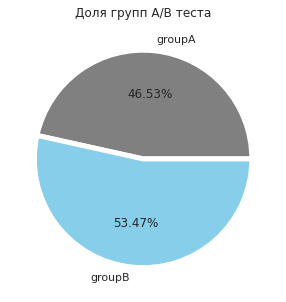

In [24]:
group=orders_new.groupby('group').agg('count')['transaction_id']

plt.figure(figsize=(5, 5))
names='groupA', 'groupB'
plt.pie(group, labels=names, autopct='%1.2f%%',  colors=['grey','skyblue'], \
        wedgeprops = {'linewidth' : 5,'edgecolor': 'white'})
plt.title("Доля групп A/B теста")
plt.show()

В датасете примерно 46.5% наблюдений по группе A и примерно 53.5% наблюдений по группе B.

#### 3.2.4. Посмотрим на распределение данных по выручке в датасете `orders_new`, 
для этого используем `plot.box()`

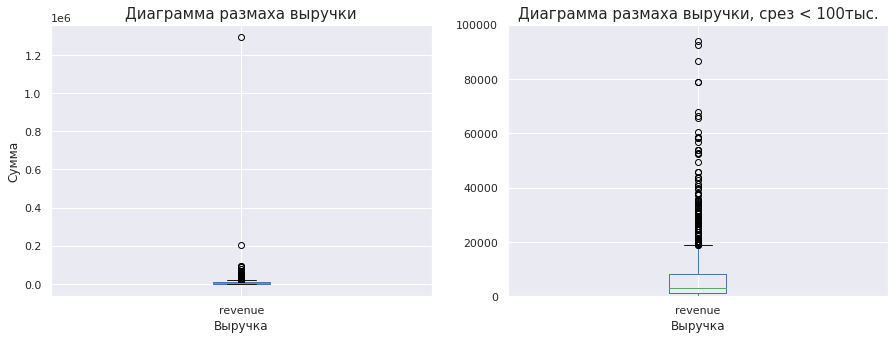

In [25]:
fig, ax=plt.subplots(1,2, figsize=(15,5))
plt.rc('axes', titlesize=15)

(orders_new['revenue'].plot.box(ax=ax[0], 
                                title='Диаграмма размаха выручки')
                      .set(xlabel='Выручка',
                          ylabel='Сумма'))

(orders_new['revenue'].plot.box(ax=ax[1], 
                                title='Диаграмма размаха выручки, срез < 100тыс.', 
                               ylim=(0, 100000))
                      .set(xlabel='Выручка'))

plt.show()

По диаграммам размаха видим, что чаще всего суммы заказов распределяются примерно на уровне до 10 тыс и, в основном объеме, не превышают 100 тыс., но есть несколько аномальных значений, примерно на 200 тыс. и 1,3 млн. Эти моменты учтем при анализе результатов A/B теста.

### 3.3. Исследование данных датасета `visitors`

#### 3.3.1. Определим минимальную и максимальную даты в датасете.

In [26]:
print('Минимальная дата:', visitors['date'].dt.date.min())
print('Максимальная дата:', visitors['date'].dt.date.max())

Минимальная дата: 2019-08-01
Максимальная дата: 2019-08-31


#### 3.3.2. Посмотрим на распределение количества пользователей по датам.
эта информация содержится в столбце *visitors*:

count    62.000000 
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64


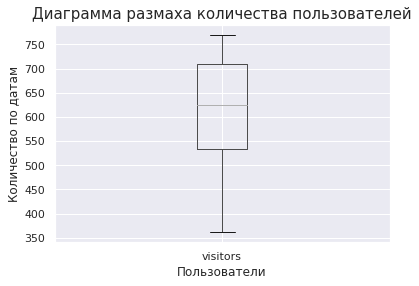

In [27]:
print(visitors['visitors'].describe())
visitors.boxplot('visitors')
plt.title('Диаграмма размаха количества пользователей', fontsize=15)
plt.xlabel('Пользователи')
plt.ylabel('Количество по датам')
plt.show()

Минимальное количество пользователей 361, максимальное - 770. Медиана расположена на уровне 625, "ящик" с верхним смещением. Большинство значений расположено в интервале между 540 и 710.

### 3.4. Выводы

На этом этапе мы более подробно изучили данные из датасетов:

1. В датасете `hypothesis` указано 9 гипотез. В оценочных параметрах этих гипотез присутствуют как 1 балл - минимальное значение, так и максимальные 10 баллов.

2. В датасете `orders_new` мы определили:
    - Минимальную дату 1 августа 2019г и максимальную дату - 31 августа 2019г. 
    - 58 пользователей, которые вошли в обе группы тестов, что говорит об ошибке при сборе данных. Заказы этих пользователей составляют 15,12% от общего количества заказов. Этих пользователей сохранили в выборке для дальнейшего корректного расчета конверсии.
    - Датасет состоит из 1197 строк (количество наблюдений) и содержит 1031 уникальных пользователя.
    - Доля группы A составляет примерно 46.5% от общего объема выборки, доля группы B - примерно 53.5%.
    - Суммы заказов распределяются примерно на уровне до 10 тыс и, в основном объеме, не превышают 100 тыс., но есть несколько аномальных значений, примерно на 200 тыс. и 1,3 млн. Эти моменты учтем при анализе результатов A/B теста.

3. По данным  датасета `visitors` чаще в ежедневные группы A/B теста входило от 540 до 710 пользователей. Минимальное количество пользователей по датам/группам - 361, максимальное - 770. Минимальная и максимальная даты совпадают с датами сета `orders_new`

На следующем этапе займемся приоритизацией гипотез.

## 4. Приоритизация гипотез

Расставим приоритеты у наших гипотез из датасета `hypothesis`. Используем для этого фреймворки `ICE` и `RICE`. Датасет содержит нужные параметры для проведения расчетов:
- Reach, 
- Impact,
- Confidence, 
- Effort

Список проверяемых гипотез:
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
- 'Запустить собственную службу доставки, что сократит срок доставки заказов',
- 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
- 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
- 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
- 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
- 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
- 'Запустить акцию, дающую скидку на товар в день рождения'

Выведем список гипотез с параметрами:

In [28]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 4.1. Приоритизация гипотез с помощью фреймворка `ICE`

Для расчета `ICE` *Impact* умножим на *Confience* и разделим на *Effort* (влияниеХуверенность/простота). Данные запишем в новый столбец *ice*. Выведем список гипотез, отсортированный по убыванию значений *ice*

In [29]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']), 2)
                    
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самая перспективная гипотеза - **'Запустить акцию, дающую скидку на товар в день рождения'**.
следом идут гипотезы - **'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'** и **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**

Можем еще 2-м гипотезам присвоить средний уровень перспективности: *'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'* и *'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'*.

### 4.2. Приоритизация гипотез с помощью фреймворка `RICE`

Для расчета `RICE` перемножим *Reach*, *Impact* и *Confience* и разделим на *Effort* (охватХвлияниеХуверенность/простота). Данные запишем в новый столбец *rice*. Выведем список гипотез, отсортированный по убыванию значений *rice*

In [30]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*\
                            hypothesis['confidence']/hypothesis['efforts']
                    
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По способу приоритизаций гипотез `RICE` видим изменения в наборе приоритетных гипотез относительно способа `ICE`.
- Самая перспективная гипотеза по `RICE`: **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**,  по `ICE` она тоже входит в тройку самых перспективных гипотез (3 место).
- 2-я в рейтинге гипотеза **'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'**, в способе `ICE` она на 5-м месте.
- 3-е место поделили 2 гипотезы **'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'** (2 место в `ICE`) и **'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'** (4-е место в `ICE`).

А самая перспективная гипотеза `ICE` *'Запустить акцию, дающую скидку на товар в день рождения'*  по способу приоритизации `RICE` переместилась на 5 место. Так или иначе 5 гипотез из 9 имеют больший приоритет и в том, и в другом способе приоритизации, но в зависимости от способа проверки они имеют разный приоритет. Обусловлено это тем, что способе `RICE` учитывает охват пользователей (*reach*), которых затронет изменение. Соответственно, чем выше уровень охвата, тем выше получается приоритет у гипотезы по способу `RICE` при прочих равных параметрах, особенно, если реализация гипотезы не требует значительных усилий (*efforts*).

Например, гипотеза-лидер `ICE` *'Запустить акцию, дающую скидку на товар в день рождения'* имеет высокие *impact, confidence*, средний уровень *efforts* - получается высокий *ice*, при этом, имеет низкий уровень охвата пользователей *reach*, поэтому уровень *rice* у этой гипотезы понизился, относительно тех, у которых высокий охват пользователей.
Поэтому приоритет гипотез по способу `RICE` изменился и лидером стала гипотеза **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**, у которой максимальный охват пользователей, выше среднего уровень влияния, средние усилия и относительно высокая уверенность в оценке прочих параметров. 

### 4.3. Выводы

При приоритизации гипотез методами `ICE` и `RICE` выделили 5 гипотез из 9, но в зависимости от используемого способа, приоритеты у этих гипотез меняются, поскольку в способе `RICE` учитывается параметр *reach* (охват пользователей, на которых повлияет изменение), и чем выше уровень охвата, при прочих равных параметрах, тем выше приоритет у гипотезы.    
Список этих гипотез по убыванию приоритета по `RICE`:
- **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**
- **'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'**
- **'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'** 
- **'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'**
- **'Запустить акцию, дающую скидку на товар в день рождения'**

Гипотезу **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'** можно обозначить как наиболее перспективную.

## 5. Анализ A/B-теста

На этом этапе мы займемся анализом результатов A/B-теста, данные для анализа содержатся в датасетах `orders_new` и `visitors`.

Подготовим кумулятивные(накопленные) данные за анализируемый период, для этого сначала создадим масcив уникальных пар по датам и группам, запишем его в переменную `dates_groups`. Удалим дубликаты методом `drop_duplicates()`

In [31]:
dates_groups = orders_new[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получили уникальные пары *Дата + Группа*.  

Посчитаем кумулятивные данные для датасета `orders`, применив функцию `np.logical_and()`, и запишем в переменную `orders_aggregated`.

In [32]:
orders_aggregated = dates_groups.apply(lambda x: \
                    orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])]\
                    .agg({'date': 'max', 'group':'max', 'transaction_id':'nunique', \
                    'visitor_id':'nunique', 'revenue':'sum'}), axis=1)\
                    .sort_values(by=['date','group'])
orders_aggregated.head(4)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748


В результате для каждой уникальной пары *Дата+Группа* мы получили накопленные значения по количеству пользователей, заказов и стоимости заказов.

Подобным образом посчитаем кумулятивные данные для датасета `visitors` и запишем их в переменную `visitors_aggregated`

In [33]:
visitors_aggregated = dates_groups.apply(lambda x: \
                    visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)\
                    .sort_values(by=['date','group'])
visitors_aggregated.head(4)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294


Объединим полученные таблицы кумулятивных значений в единый датафрейм `cumulative_data`, используем метод `merge()`

In [34]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.head(4)

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294


Переименуем названия столбцов датафрейма `cumulative_data`:

- *date* - дата;
- *group* - группа A/B теста;
- *orders* - кумулятивное количество заказов на указанную дату в указанной группе;
- *buyers* - кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- *revenue* - кумулятивная выручка на указанную дату в указанной группе;
- *visitors* - кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

и сразу проверим изменения.

In [35]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.columns

Index(['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'], dtype='object')

### 5.1. Построим график кумулятивной выручки по группам

Для построения графика по группам запишем данные о заказах и кумулятивной выручке группы А в переменную `cumulative_revenue_A`, для группы В в переменную `cumulative_revenue_B`. Срезы выполним с помощью метода `query`.

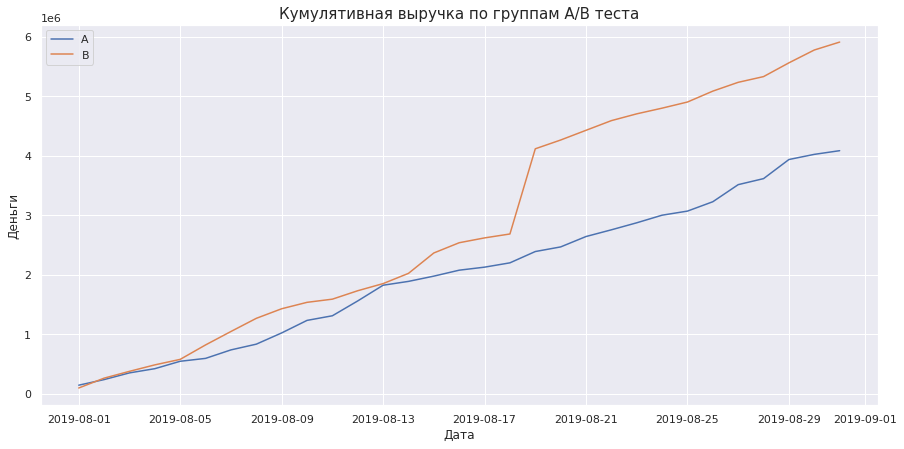

In [36]:
cumulative_revenue_A = cumulative_data.query('group == "A"')[['date','revenue', 'orders']]
cumulative_revenue_B  = cumulative_data.query('group == "B"')[['date','revenue', 'orders']]

plt.figure(figsize=(15,7))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.title('Кумулятивная выручка по группам A/B теста')
plt.xlabel('Дата')
plt.ylabel('Деньги')
plt.legend()
plt.show()

Первые 5 дней выручка групп растет практически равномерно, с 5 до 13 августа выручка в группе В превышает выручку группы А, 13 августа выручки групп уравниваются и далее выручка группы В стабильно превышает выручку из группы А.
У группы А мы наблюдаем практически равномерное увеличение, есть небольшой скачок в период 11-13 августа, что помогло уравнять выручку с группой В. У группы В видим резкий скачок выручки 19 августа. Возможно, резко увеличилось количество заказов в эту дату, либо это было примерно то же количество, но дорогие заказы, которые оказали существенное влияние на выручку в группе В.

### 5.2. Построим график кумулятивного среднего чека по группам

Для расчета среднего чека по датам и группам разделим кумулятивную выручку на кумулятивное число заказов:

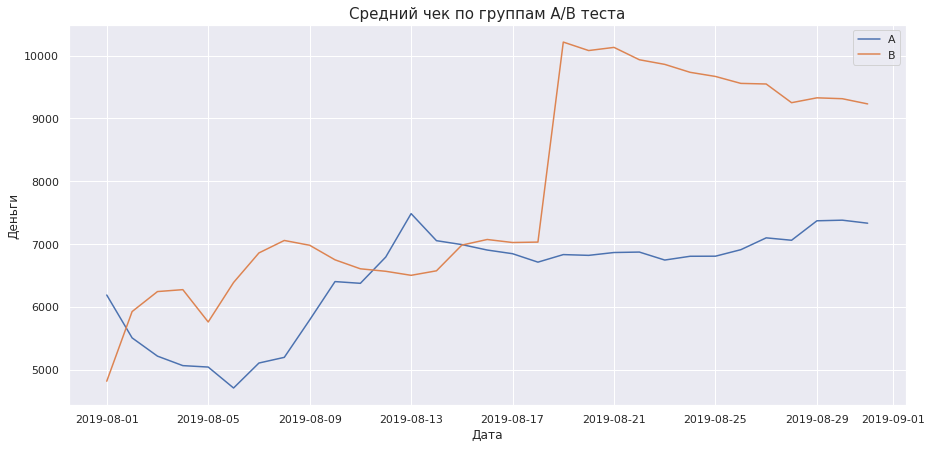

In [37]:
plt.figure(figsize=(15,7))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Средний чек по группам A/B теста')
plt.xlabel('Дата')
plt.ylabel('Деньги')
plt.legend()
plt.show()

По графику видим с  3 по 11 августа и с 16 августа средний чек по группе В превышает средний чек по группе А. Группа А лидировала только в даты 1 и 12-14 августа, после чего средний чек группы А немного снизился, выровнялся  и до 26 августа находился примерно на уровне 6.7-6.8 тыс. С 27 августа средний чек преодолел планку в 7 тыс.
Средний чек в группе В показывает скачки, особенно резкий скачок наблюдаем 19 августа, этот скачок мы уже ранее увидели на графике кумулятивной выручки по группе. Это говорит о том, что 19 августа интернет-магазин получил  крупный заказ в группе В.
К концу отчетного периода средний чек группы В превышает средний чек группы А примерно на 2 тыс.

### 5.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Чтобы нагляднее увидеть разницу между группами, построим график относительного различия.
Для этого объединим данные групп по датам в одном датафрейме `merged_cumulative_revenue`, используем метод `merge()`.

In [38]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, \
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


И посчитаем каждую точку графика через отношение: (кумулятивная метрика группы B / кумулятивная метрика группы A - 1)
через параметр `axhline()` зададим горизонтальную линию на уровне "0": выше нуля - преобладает группа В, ниже нуля - преобладает группа А.

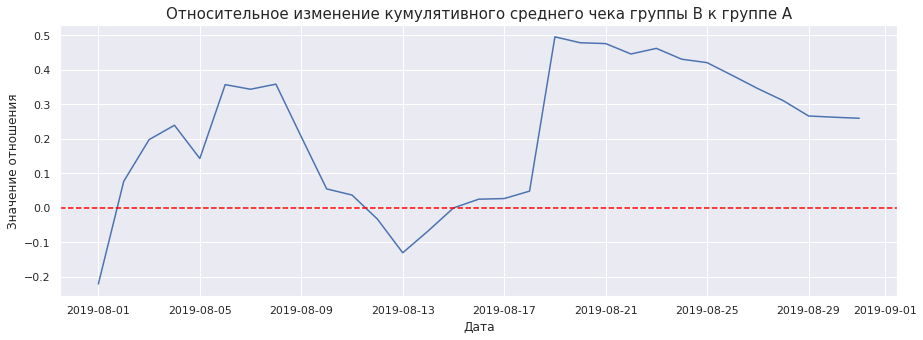

In [39]:
plt.figure(figsize=(15,5))
plt.plot(merged_cumulative_revenue['date'], \
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/\
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Значение отношения')
plt.show()

В нескольких частях графика видим явное преобладание группы В с резкими скачками, а также с резкими снижениями в период  9-13 августа. В целом по графику очевидно преобладание среднего чека по группе В.
В группе А были более крупные заказы 1 и с 12 по 14 августа, все остальное время преобладает группа В.

### 5.4. Построим график кумулятивного среднего количества заказов на посетителя по группам

Для расчета кумулятивной конверсии разделим кумулятивное количество заказов на кумулятивное количество посетителей интернет-магазина и запишем в новый столбец *conversion* датафрейма `cumulative_data`

In [40]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data.head(4)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776


Зададим минимальную и максимальную даты

In [41]:
date_min = pd.to_datetime(cumulative_data['date'].min())
date_max = pd.to_datetime(cumulative_data['date'].max())

Срез методом `query()` по группе А запишем в переменную `cumulative_data_A`, а по группе В - в `cumulative_data_B` и построим график. Минимальную и максимальную даты используем для установки масштаба оси Х нашего графика, границы оси Y установим от 0 до 0.06. 

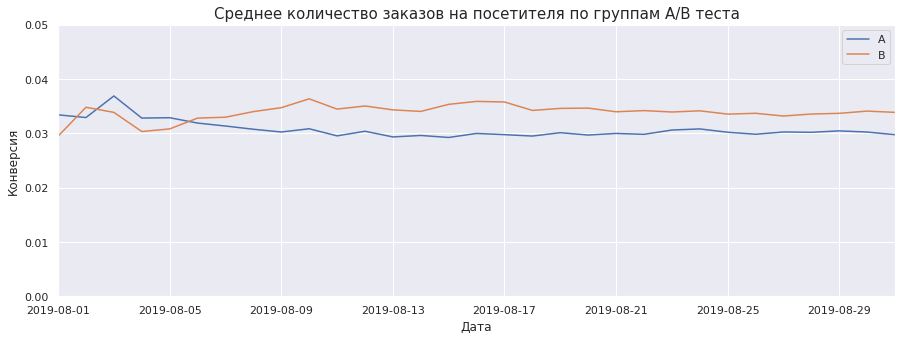

In [42]:
cumulative_data_A = cumulative_data.query('group == "A"')
cumulative_data_B = cumulative_data.query('group == "B"')


plt.figure(figsize=(15,5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.title('Среднее количество заказов на посетителя по группам A/B теста')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis([date_min, date_max, 0, 0.05])

plt.show()

Посетители из группы А конвертировались лучше ориентировочно до 5 августа. С 7 августа наблюдается лучшая конверсия в группе В. С этого периода конверсия стабильно выровнялась в обеих группах, у А примерно 3%, у В примерно 3.5%.

### 5.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Чтобы нагляднее увидеть разницу между группами, построим график относительного изменения.
Для этого объединим данные групп по датам в одном датфрейме `merged_cumulative_conversions`, используем метод `merge()`.

In [43]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']]\
  .merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Посчитаем каждую точку графика через отношение: (кумулятивная метрика группы B / кумулятивная метрика группы A - 1)
через параметр `axhline()` зададим горизонтальные линии на уровне 0 и 0.1

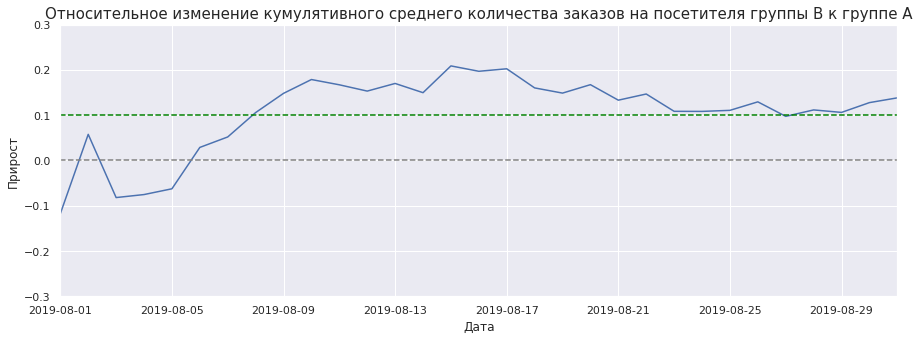

In [44]:
plt.figure(figsize=(15,5))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/ \
                                                merged_cumulative_conversions['conversionA']-1)
         
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Прирост')   

plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.axis([date_min, date_max, -0.3, 0.3]) 
plt.show()

Начиная с 6 августа выше конверсия группы В, с 8 августа зафиксирован стабильный прирост более 10% у группы В.

### 5.6. Построим точечный график количества заказов по пользователям

Посчитаем количество заказов на пользователя. Информация о заказах хранится в датафрейме `orders_new`. Сгруппированные данные запишем в переменную `orders_users`

In [45]:
orders_users = orders_new.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

orders_users.columns = ['user_id', 'orders']
orders_users.sort_values(by='orders', ascending=False).head().reset_index(drop=True)

,user_id,orders
0,4256040402,11
1,2458001652,11
2,2378935119,9
3,2038680547,8
4,199603092,5


Построим точечные график по данным `orders_users`. В переменную `x_values` запишем сгенерированные номера наблюдений и передадим их оси Х, а по оси Y отложим количество заказов.

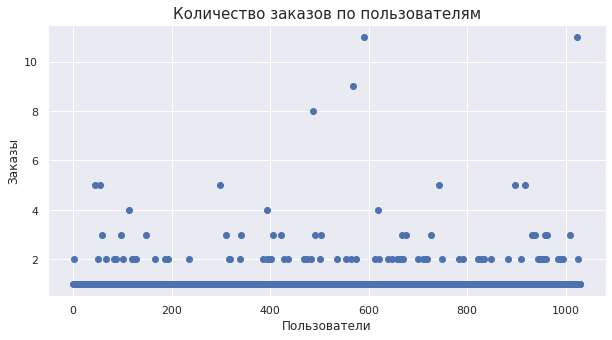

In [46]:
plt.figure(figsize=(10,5))

x_values = pd.Series(range(0,len(orders_users)))

plt.scatter(x_values, orders_users['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show()

По графику мы видим, что большинство клиентов совершили по одному заказу, есть некая часть клиентов  с 2-мя заказами и есть клиенты, которые заказали 3, 4, 5, 8, 9 и 11 раз. 

### 5.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

Для расчета используем метод `percentile()`. Значение 95-го перцентиля запишем в переменную `orders_perc_95`, а значение 99-го перцентиля в переменную `orders_perc_99`

In [47]:
orders_perc_95 = np.percentile(orders_users['orders'], 95)
orders_perc_95

2.0

In [48]:
orders_perc_99 = np.percentile(orders_users['orders'], 99)
orders_perc_99

4.0

Не более 5% пользователей оформили более 2 заказов и 1% пользователей оформили более 4-х заказов. Определим границу аномальных значений более 4-х заказов, т.е. более 99 перцентиля.

### 5.8. Построим точечный график стоимостей заказов

Информация о стоимости заказов хранится в датафрейме `orders_new` в столбце *revenue*. В переменную `x_values` запишем сгенерированные номера наблюдений и передадим их оси Х,  оси Y - стоимость заказов.

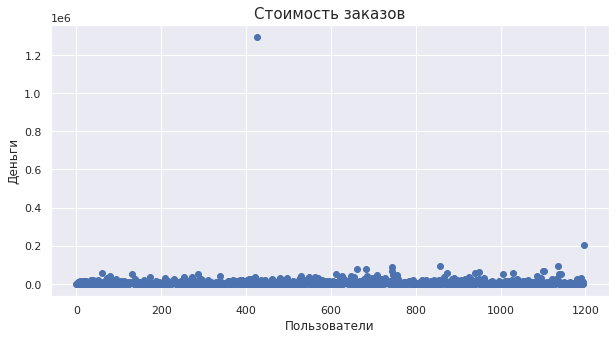

In [49]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(orders_new['revenue'])))

plt.scatter(x_values, orders_new['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Деньги')
plt.show()

По графику видим наличие единичных выбросов на уровне 200 тыс и 1.3 млн. Это явно аномальные значения выручки. Нужно понять, сколько их еще. На этапе исследования данных мы определили, что большинство пользователей оформляют заказы стоимостью до 10 тыс, но есть и значительная доля тех, чьи покупки составляют до 100 тыс. Определим уровень аномальных значений с помощью перцентилей.

### 5.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [50]:
revenue_perc_95 = np.percentile(orders_new['revenue'], 95)
revenue_perc_95

28000.000000000004

In [51]:
revenue_perc_99 = np.percentile(orders_new['revenue'], 99)
revenue_perc_99

58233.19999999999

Видим 5% заказов стоимостью более 28000 и 1% больше 58233. Установим границу аномальных значений более 95-го перцентиля.

### 5.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем и проверим гипотезу.   
- Нулевая гипотеза: Среднее количество заказов между группами не различается. 
- Альтернативная гипотеза: Есть различия в среднем количестве заказов между группами.


Для расчета статистической значимости используем непараметрический тест Манна-Уитни `st.mannwhitneyu()`. Для проведения тестирования нам нужно сформировать 2 ранжированные выборки по каждой группе А/В теста.

#### 5.10.1. Сформируем датафреймы с датами и количеством посетителей в конкретную дату по группам А и В
 
Данные о посетителях хранятся в датафрейме `visitors`.

In [52]:
visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_in_date_A']
visitors_A.head(3)

,date,visitors_in_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507


In [53]:
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_in_date_B']
visitors_B.head(3)

,date,visitors_in_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509


#### 5.10.2. Сформируем общие списки покупателей интернет магазина по группам A/B теста

Создадим списки пользователей каждой группы, совершивших заказы. Для группы А запишем в переменную `orders_by_users_A`, для группы В в переменную `orders_by_users_B`

In [54]:
orders_by_users_A = (orders_new[orders_new['group'] == 'A']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_A.columns = ['user_id', 'orders']
orders_by_users_A.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [55]:
orders_by_users_B = (orders_new[orders_new['group'] == 'B']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_B.columns = ['user_id', 'orders']
orders_by_users_B.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


#### 5.10.3. Сформируем общие ранжированные списки пользователей по группам. 

Пользователям с заказами будет соответствовать количество заказов, а пользователям без заказов будет соответствовать 0.

Количество пользователей без заказов для группы А определим путем следующего расчета: visitors_A['visitors_in_date_A'].sum() - len(orders_by_users_A['orders']), аналогично рассчитаем для В.

Для создания индексов списка используем функцию `np.arange()`, а для объединения значений 2-х списков с заказами и без -  функцию  `pd.concat()`.

Список по группе А запишем в переменную `list_A`, а список группы В в переменную `list_B`.

In [56]:
list_A = pd.concat([orders_by_users_A['orders'], pd.Series(0,
            index=np.arange(visitors_A['visitors_in_date_A'].sum() - len(orders_by_users_A['orders'])),
            name='orders')], axis=0)
list_A

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [57]:
list_B = pd.concat([orders_by_users_B['orders'], pd.Series(0,
            index=np.arange(visitors_B['visitors_in_date_B'].sum() - len(orders_by_users_B['orders'])),
            name='orders')], axis=0)
list_B

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

Установим уровень статистической значимости `alpha`, равный 0.05 и применим статистический критерий Манна-Уитни к полученным выборкам: 

In [58]:
alpha = 0.05 
u_orders_AB = st.mannwhitneyu(list_A, list_B)

print('p-значение для сравнения групп А и B: ', u_orders_AB.pvalue)

if u_orders_AB.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B'
    )

p-значение для сравнения групп А и B:  0.016792355056752608
Отвергаем нулевую гипотезу для сравнения групп А и B


Выведем относительный прирост среднего числа заказов группы B

In [59]:
list_B.mean() / list_A.mean() - 1

0.13807884655320146

При уровне статистической значимости 0.05 мы можем отвергнуть нулевую гипотезу о равенстве среднего количества заказов между группами A/B теста. Мы видим разницу в количестве заказов между группами на 13.8% (относительный прирост по группе В)

### 5.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: Различия в среднем чеке между группами отсутствуют. 

Альтернативная гипотеза: Есть различия в среднем чеке между группами. 

Установим уровень статистической значимости `alpha` 0.05

In [60]:
alpha = 0.05 
u_revenue_AB = (st.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], 
                                orders_new[orders_new['group']=='B']['revenue']))

print('p-значение для сравнения групп А и B: ', u_revenue_AB.pvalue)

if u_revenue_AB.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

p-значение для сравнения групп А и B:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


Выведем относительный прирост среднего чека группы B

In [61]:
orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1

0.2587136699126005

Не получилось отвергнуть нулевую гипотезу о равенстве средних чеков между группами А и В, статистически значимые различия мы не обнаружили, p-value значительно больше 0.05. Тем не менее,  мы видим, средний чек в группе В примерно на 26% выше среднего чека по группе А. Возможно, на это влияет наличие выбросов, проверим, как изменятся результаты проверки по очищенным данным.

### 5.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- Нулевая гипотеза: Среднее количество заказов по очищенным данным между группами не различается. 
- Альтернативная гипотеза: Есть различия в среднем количестве заказов по очищенным данным между группами.

#### 5.12.1. Подготовим список с аномальными данными
Ранее мы определили границу аномальных значений в количестве заказов более 99-го перцентиля. Это 3 заказа на пользователя. И более 95-го перцентиля по выручке, граница суммы составила 26785. Сформируем выборки по аномальным юзерам по заказам и по выручке и объединим их в общий список через функцию `pd.concat()`

Составим список пользователей с аномальными заказами `orders_abnormal`, для среза используем метод `query()` и внешнюю переменную, равную 99-му перцентилю количества заказов `orders_perc_99` 

In [62]:
orders_abnormal = pd.concat([orders_by_users_A.query('orders > @orders_perc_99')['user_id'],
                            orders_by_users_B.query('orders > @orders_perc_99')['user_id']], axis=0 )

Для формирования списка с аномальными значениями по выручке `revenue_abnormal` используем для среза  внешнюю переменную равную 95-му перцентилю `revenue_perc_95`.

In [63]:
revenue_abnormal = orders_new.query('revenue > @revenue_perc_95')['visitor_id']

Объединим списки в переменной `abnormal_users` и определим размер списка через `shape`

In [64]:
abnormal_users = (pd.concat([orders_abnormal, revenue_abnormal], axis=0)
                #.drop_duplicates()
                .sort_values())
abnormal_users.shape

(65,)

Общий список с аномальными выручкой и количеством заказов состоит из 65 пользователей.

#### 5.12.2. Составим списки всех пользователей в группах А/В теста, исключив аномальные значения

Очищенные данные по группе А запишем в переменную `list_A_filtered`, по группе В в переменную `list_B_filtered`

In [65]:
list_A_filtered = (pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['user_id']
                                                               .isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors_A['visitors_in_date_A'].sum() - len(orders_by_users_A['orders'])),
        name='orders')],  axis=0))

In [66]:
list_B_filtered = (pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['user_id']
                                                               .isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors_B['visitors_in_date_B'].sum() - len(orders_by_users_B['orders'])),
        name='orders')],  axis=0))

Установим уровень статистической значимости `alpha` 0.05

In [67]:
alpha = 0.05 
u_orders_AB_filtered = st.mannwhitneyu(list_A_filtered, list_B_filtered)

print('p-значение для сравнения групп А и B: ', u_orders_AB_filtered.pvalue)

if u_orders_AB_filtered.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

p-значение для сравнения групп А и B:  0.018457083488550192
Отвергаем нулевую гипотезу для сравнения групп А и B


Выведем относительный прирост среднего числа заказов группы B по очищенным данным

In [68]:
list_B_filtered.mean()/list_A_filtered.mean()-1

0.14534846108575383

Результаты проверки по очищенным данным не меняют общую картину о среднем количестве заказов. При статистическом уровне значимости 0.05 у нас снова получилось отвергнуть нулевую гипотезу о равенстве среднего количества заказов  между группами А и В,  относительная разница в среднем количестве заказов у группы В на 14.5%-х пункта больше (по неочищенным данным было 13.8%-х пункта).

Посмотрим, как изменились результаты проверки среднего чека по очищенным данным.

### 5.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: Различия в среднем чеке по очищенным данным между группами отсутствуют. 

Альтернативная гипотеза: Есть различия в среднем чеке по очищенным данным между группами. 

Установим уровень статистической значимости `alpha` 0.05

In [69]:
alpha = 0.05

u_revenue_AB_filtered = st.mannwhitneyu(
            orders_new[np.logical_and(orders_new['group'] == 'A',
                    np.logical_not(orders_new['visitor_id'].isin(abnormal_users)))]['revenue'],
    
            orders_new[np.logical_and(orders_new['group'] == 'B',
                    np.logical_not(orders_new['visitor_id'].isin(abnormal_users)))]['revenue'])
    
print('p-значение для сравнения групп А и B: ', u_revenue_AB_filtered.pvalue)

if u_revenue_AB_filtered.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

p-значение для сравнения групп А и B:  0.9612742488180921
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


Выведем относительный прирост среднего чека группы B по очищенным данным

In [70]:
(orders_new[np.logical_and(orders_new['group'] == 'B', np.logical_not(orders_new['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() 
/ 
orders_new[np.logical_and(orders_new['group'] == 'A', np.logical_not(orders_new['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1)

-0.013825214710713074

По очищенным данным p-value стал еще больше, был 0.73, стал 0.96. А вот относительный прирост среднего чека по группе В значительно снизился - примерно на 27%-х пунктов и стал ниже среднего чека по группе А. Это говорит о том, что в группе В было несколько дорогостоящих заказов, которые в итоге и повлияли на уровень среднего чека по неочищенным данным в этой группе.

### 5.14. Примите решение по результатам теста и объясните его. 

- По результатам А/В теста можем говорить о наличии статистически значимого различия в среднем количестве заказов между группами теста и по "сырым" и по очищенным данным. Получилось опровергнуть нулевую гипотезу о равенстве конверсий между группами. Пользователи из групп В показали лучшую конверсию (относительный прирост на 14.5%-- пункта по очищенным данным).
- Статистически значимое различие в среднем чеке между группами мы не обнаружили ни по "сырым", ни по очищенным данным.
- По графику конверсии, а так же, по результатам проверки статистической значимости среднего количества заказов, мы видим, что пользователи из группы В лучше конвертируются в заказчиков, но при этом сохраняют примерно тот же средний чек, что и пользователи в группе А.
- Можем сделать вывод, что введенные изменения помогут интернет магазину увеличить долю покупателей, что скажется на росте доходов даже при сохранении суммы среднего чека. Тест можем остановить и признать его успешным.

### 5.15. Выводы

На этом этапе на основе кумулятивных данных по группам А/В теста мы построили сравнительные графики выручки, среднего количества заказов, среднего чека, а также посчитали статистическую значимость конверсии и среднего чека по группам на основе "сырых" и очищенных данных. Для расчета очищенных данных мы избавились от аномальных значений. В аномальные значения мы определили:
- количество заказов более 99 перцентиля, это клиенты более, чем с 4 заказами;
- выручку более 95 перцентиля, заказы с суммой более 28000.

Получили следующие результаты:

- Примерно с середины периода кумулятивная выручка в группе В стабильно выше, чем в группе А;

- Уровень среднего чека колеблется в обеих группах, присутствуют резкие скачки в группе В, которые были обусловлены наличием дорогих заказов - выбросами. Относительный прирост среднего чека без этих выбросов в группе B оказался несколько ниже, чем в группе А - примерно на 1.4%-х пункта по очищенным данным. Гипотезу о равенстве среднего чека между группами опровергнуть не получилось, статистическая значимость различий не выявлена ни по "сырым". ни по очищенным данным. 

- Пользователи из группы В лучше конвертировались в покупателей, чем в группе А. В группе В конверсия стабильно выше начиная со 2-й недели тестирования. Относительный прирост около 14.5%-х пункта. Проверка гипотезы о статистической значимости различий среднего количества заказов  позволила опровергнуть равенство конверсий между группами как по сырым, так и по очищенным данным.

- Тест можем остановить и признать его успешным. По результатам теста уже можем сделать вывод, что введенные изменения помогут интернет-магазину увеличить долю покупателей - повысить конверсию, что отразится на росте доходов, даже при сохранении суммы среднего чека на текущем уровне. 

## 6. Итоги исследования

**Целью** исследования для нас было:   
Приоритизировать гипотезы по увеличению выручки интернет-магазина. Проанализировать результаты A/B теста.

1. Для достижения цели мы провели анализ 3-х датасетов: 
    - *hypothesis* -  с информацией о 9 гипотезах для приоритизации;
    - *orders_new* - с информацией о заказах;
    - *visitors* - с данными о посетителях.

Предоставленные данные были хорошего качества, в них отсутствовали пропуски и дубликаты. На этапе предобработки мы только изменили тип данных в столбцах с датами на тип *datetime* и в 2-х столбцах применили "змеиный" стиль.


2. В датасетах содержатся данные за период с 1 по 31 августа 2019 года. 
    - При более подробном исследовании датасетов мы выявили 58 пользователей, которые вошли в обе группы тестов, что говорит об ошибке при сборе данных. Заказы этих пользователей составляют 15,12% от общего количества заказов. Этих пользователей сохранили в выборке для дальнейшего корректного расчета конверсии.
    - Датасет состоит из 1197 строк (количество наблюдений) и содержит 1031 уникальных пользователя.
    - Доля группы A составляет примерно 46.5% от общего объема выборки, доля группы B - примерно 53.5%.
    - Суммы заказов распределяются примерно на уровне до 10 тыс и, в основном объеме, не превышают 100 тыс., есть несколько аномальных значений, примерно на 200 тыс. и 1,3 млн.
    
    
3. При приоритизации гипотез методами `ICE` и `RICE` выделили 5 гипотез из 9, но в зависимости от используемого способа, приоритеты у этих гипотез меняются, поскольку в способе `RICE` учитывается параметр *reach* (охват пользователей, на которых повлияет изменение), и чем выше уровень охвата, при прочих равных параметрах, тем выше приоритет у гипотезы.    Список этих гипотез по убыванию приоритета по `RICE`:
    - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок';
    - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа';
    - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей';
    - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию';
    - 'Запустить акцию, дающую скидку на товар в день рождения'.

Гипотезу 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' можно обозначить как наиболее перспективную.

4. На основе кумулятивных данных по группам А/В теста мы построили сравнительные графики выручки, среднего количества заказов, среднего чека, а также посчитали статистическую значимость конверсии и среднего чека по группам на основе "сырых" и очищенных данных. Для расчета очищенных данных мы избавились от аномальных значений. В аномальные значения мы определили количество заказов более 99 перцентиля, это клиенты, которые заказали более 4-х раз и выручку более 95 перцентиля, заказы с суммой более 28000. Получили следующие результаты:

    - Примерно с середины периода кумулятивная выручка в группе В стабильно выше, чем в группе А;
    - Уровень среднего чека колеблется в обеих группах, присутствуют резкие скачки в группе В, которые были обусловлены наличием дорогих заказов - выбросами. Относительный прирост среднего чека без этих выбросов в группе B оказался несколько ниже, чем в группе А - примерно на 1.4%-х пункта по очищенным данным. Гипотезу о равенстве среднего чека между группами опровергнуть не получилось, статистическая значимость различий не выявлена ни по "сырым", ни по очищенным данным.
    - Пользователи из группы В лучше конвертировались в покупателей, чем в группе А. По группе В конверсия стабильно выше, начиная со 2-й недели тестирования. Относительный прирост около 14.5%-х пункта по очищенным данным. Проверка гипотезы о статистической значимости различий среднего количества заказов  позволила опровергнуть равенство конверсий между группами как по сырым, так и по очищенным данным.
    

5. Тест можем остановить и признать его успешным. По результатам теста уже можем сделать вывод, что введенные изменения помогут интернет-магазину увеличить долю покупателей - повысить конверсию, что отразится на росте доходов, даже при сохранении суммы среднего чека на текущем уровне.